## Imports

In [1]:
# from tools import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tqdm
import random
from extract_center import CenterExtracter

In [2]:
images_dir = "../data/images1"

In [3]:
plt.rcdefaults()

## Getting a List of Images

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def get_center(
    image_path, crop=None, h=100, skip_x=None, skip_y=None, contrast=110, plot=True
):
    """
    Determines the coordinates of center and the radius of the drop

    Parameters
    ----------
    image_path : str
        Path to the image
    crop : tuple with (x,y), optional
        Coordinates to crop the image. The default is None.
        x: int
            x-coordinate of the top-left corner
        y: int
            y-coordinate of the top-left corner
    h : int, optional
        Height of the image. The default is 100.
    skip_x : int, optional
        Number of pixels to skip in x direction. The default is None.
    skip_y : int, optional
        Number of pixels to skip in y direction. The default is None.
    contrast : int, optional
        Contrast threshold. The default is 110.
    plot : bool, optional
        If True, plots the image. The default is True.

    Returns
    -------
    r : int
        Radius of the drop
    (x,y) : tuple
        Coordinates of the center
    """
    # Reading image
    im = plt.imread(image_path)

    # Cropping image
    if crop is not None:
        crop = [crop[0], crop[1], crop[0] + h, crop[1] + h]
        im_c = im[crop[1] : crop[3], crop[0] : crop[2]]
    else:
        im_c = im

    # Using contrast threshold
    im_f = (im_c > contrast).astype(int)
    skip_pixels_x = skip_x if skip_x is not None else 0

    # Along axis 0
    xs = im_f.argmin(axis=0)
    xss = np.nonzero(xs)
    xl = skip_pixels_x + xss[0][0]
    xr = skip_pixels_x + xss[0][-1]

    # Along axis 1
    skip_pixels_y = skip_y if skip_y is not None else 0
    ys = im_f.argmin(axis=1)
    yss = np.nonzero(ys)
    yu = yss[0][0]
    yd = yss[0][-1]

    # Calculating center and radius
    r1 = np.abs((xl - xr)) / 2
    r2 = np.abs((yu - yd)) / 2
    r = int((r1 + r2) / 2)
    x = int(crop[0] + xl + r)
    y = int(crop[1] + yu + r)

    if plot:
        # Plotting the image with center
        plt.figure(figsize=(10, 10))
        plt.imshow(im, cmap="gray")
        plt.hlines(y, 0, im.shape[1], color="g")
        plt.vlines(x, 0, im.shape[0], color="b")
        plt.annotate(f"{x,y}", xy=(x, y), xytext=(x + 20, y + 30), color="r")
        plt.grid()
        plt.show()
    return r, (x, y)


In [4]:
files = os.listdir(images_dir)
images = [f for f in files if f.endswith(".jpg")]
len(images)

171

In [5]:
id = [num for num in range(0, len(images))]
img_path = [images_dir+"/" + str(num) + ".jpg" for num in range(0, len(images))]

In [6]:
df = pd.DataFrame({"id": id, "image_path": img_path})
df.head()

id             image_path
0   0  ../data/images1/0.jpg
1   1  ../data/images1/1.jpg
2   2  ../data/images1/2.jpg
3   3  ../data/images1/3.jpg
4   4  ../data/images1/4.jpg

In [7]:
# df.to_csv("images.csv", index=False)

In [7]:
def show_image(image_path):
    plt.figure(figsize=(10, 10))
    plt.imshow(plt.imread(image_path), cmap="gray")
    plt.grid()
    plt.title(image_path)
    plt.show()

## Brute Force

In [19]:
coordinates = []
crop = (800, 450)
for f in tqdm.tqdm(df["image_path"], desc="Extracting coordinates..."):
    try:
        coordinates.append(get_center(f, plot=False, crop=crop))
    except:
        coordinates.append(None)

Extracting coordinates...: 100%|██████████| 171/171 [00:01<00:00, 85.59it/s]


In [20]:
df["coordinates"] = coordinates
df.head()

id             image_path coordinates
0   0  ../data/images1/0.jpg        None
1   1  ../data/images1/1.jpg        None
2   2  ../data/images1/2.jpg        None
3   3  ../data/images1/3.jpg        None
4   4  ../data/images1/4.jpg        None

In [21]:
df["coordinates"].notna().sum()

31

In [22]:
df[df["coordinates"].notna()]

id              image_path       coordinates
35  35  ../data/images1/35.jpg   (2, (867, 452))
36  36  ../data/images1/36.jpg   (4, (867, 454))
37  37  ../data/images1/37.jpg   (5, (866, 455))
38  38  ../data/images1/38.jpg   (6, (866, 456))
39  39  ../data/images1/39.jpg   (6, (867, 456))
40  40  ../data/images1/40.jpg   (9, (867, 459))
41  41  ../data/images1/41.jpg  (10, (868, 460))
42  42  ../data/images1/42.jpg  (10, (868, 461))
43  43  ../data/images1/43.jpg  (10, (868, 464))
44  44  ../data/images1/44.jpg  (10, (868, 467))
45  45  ../data/images1/45.jpg  (10, (868, 470))
46  46  ../data/images1/46.jpg  (11, (869, 474))
47  47  ../data/images1/47.jpg  (10, (868, 477))
48  48  ../data/images1/48.jpg  (10, (868, 482))
49  49  ../data/images1/49.jpg  (10, (867, 486))
50  50  ../data/images1/50.jpg  (10, (867, 490))
51  51  ../data/images1/51.jpg  (10, (867, 494))
52  52  ../data/images1/52.jpg  (10, (867, 497))
53  53  ../data/images1/53.jpg  (10, (867, 501))
54  54  ../data/images1/54.jpg  (10, (867, 505))
55  55  ../data/images1/55.jpg  (10, (868, 509))
56  56  ../data/images1/56.jpg  (10, (868, 513))
57  57  ../data/images1/57.jpg  (10, (867, 517))
58  58  ../data/images1/58.jpg  (10, (867, 522))
59  59  ../data/images1/59.jpg  (10, (867, 526))
60  60  ../data/images1/60.jpg  (10, (867, 532))
61  61  ../data/images1/61.jpg  (10, (867, 537))
62  62  ../data/images1/62.jpg  (10, (866, 542))
63  63  ../data/images1/63.jpg   (8, (864, 546))
64  64  ../data/images1/64.jpg   (7, (863, 549))
65  65  ../data/images1/65.jpg   (4, (864, 551))

### Corner Cases

In [23]:
images = df["image_path"]

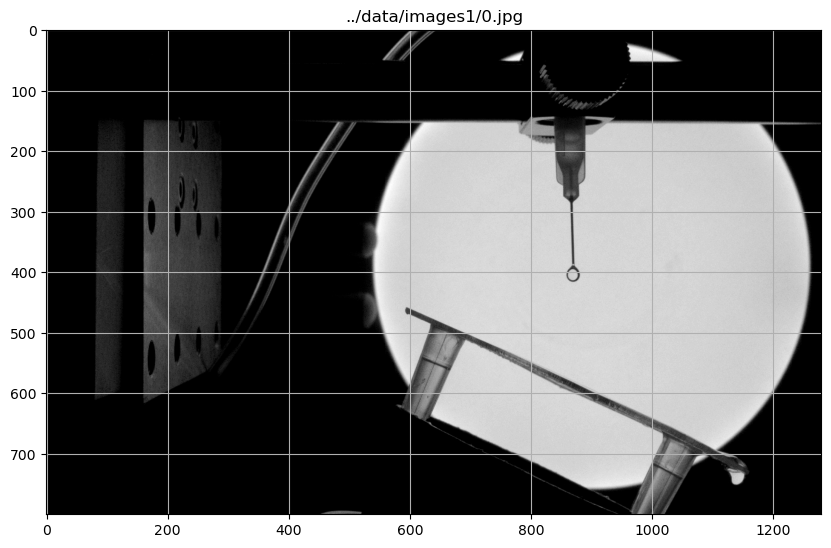

In [24]:
show_image(images[0])

1


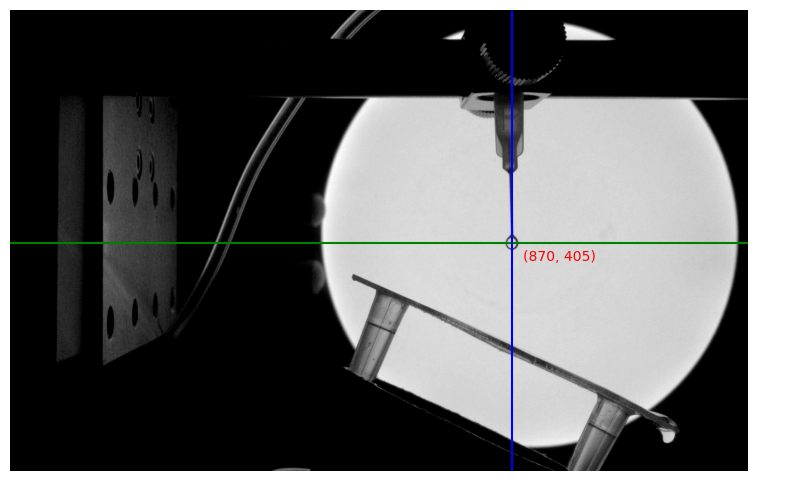

5


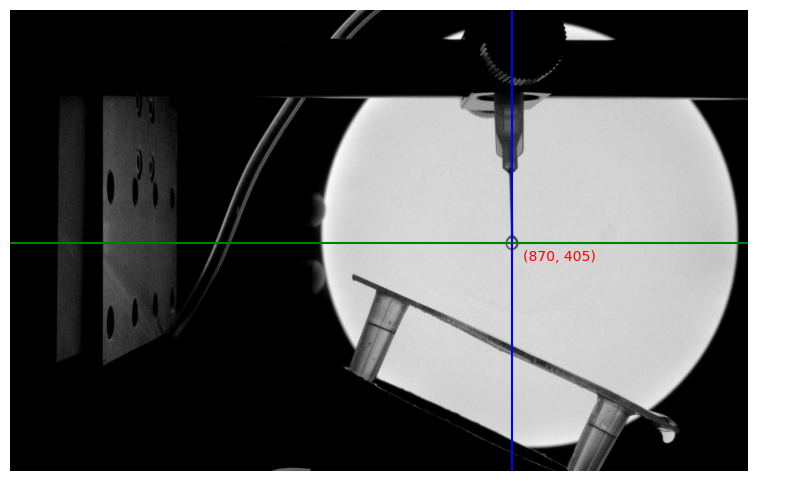

10


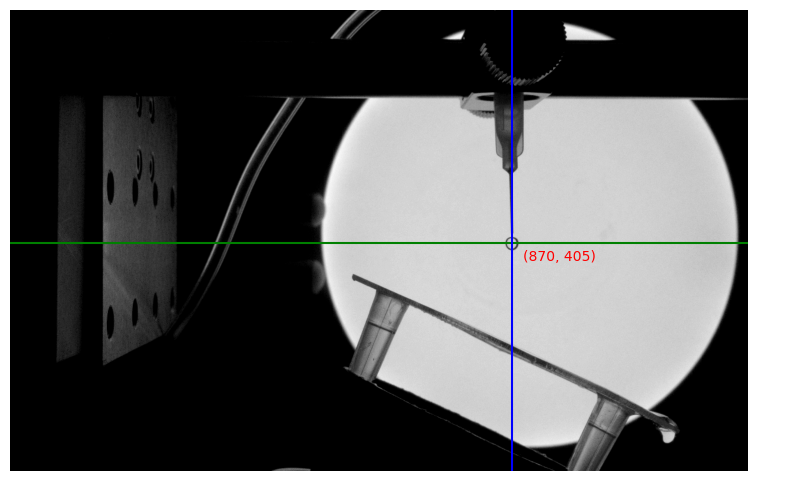

20


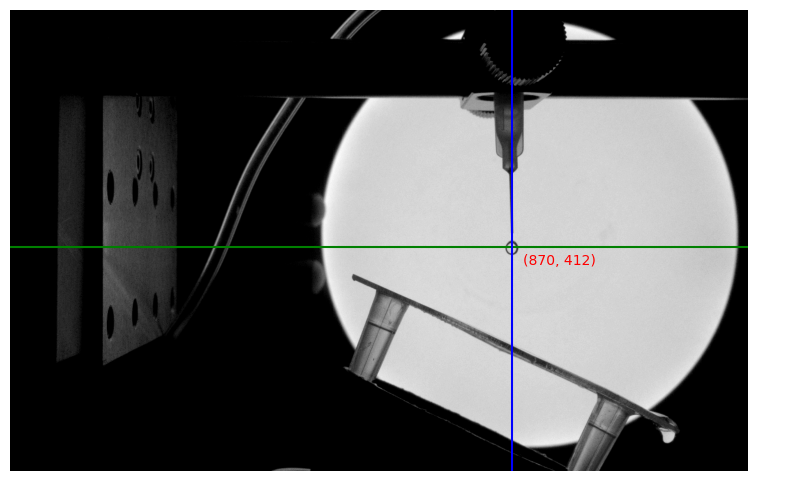

30


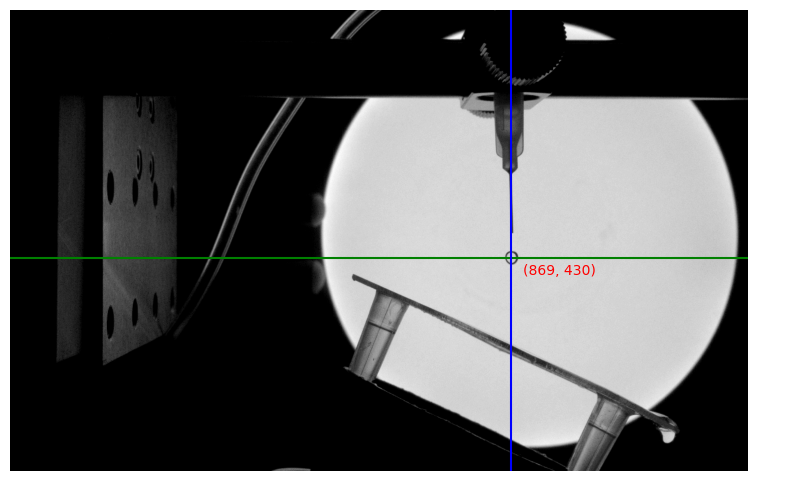

40


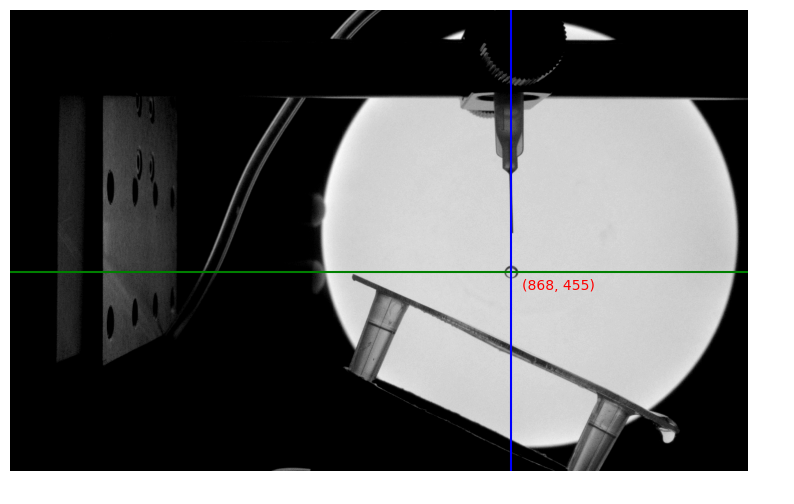

50


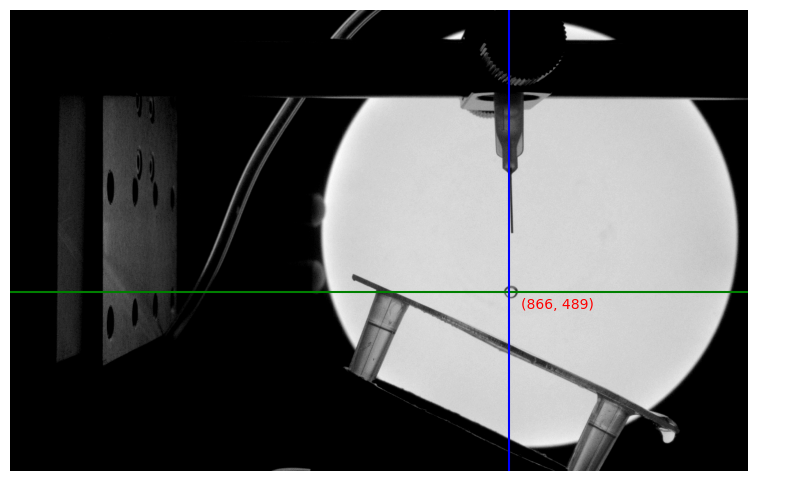

60


IndexError: index 0 is out of bounds for axis 0 with size 0

In [18]:
crop = (800, 395)
samples = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for sample in samples:
    print(sample)
    get_center(images[sample], plot=True, crop=crop)

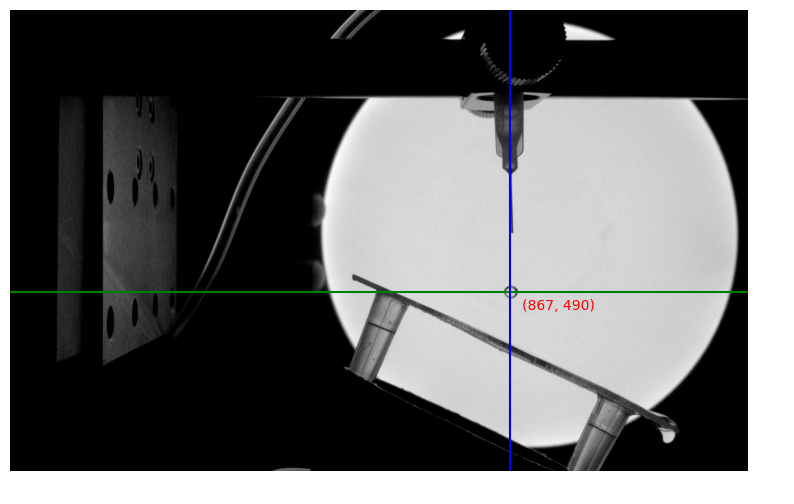

(10, (867, 490))

In [19]:
crop = (800, 410)
sample = 50
get_center(images[sample], plot=True, crop=crop)

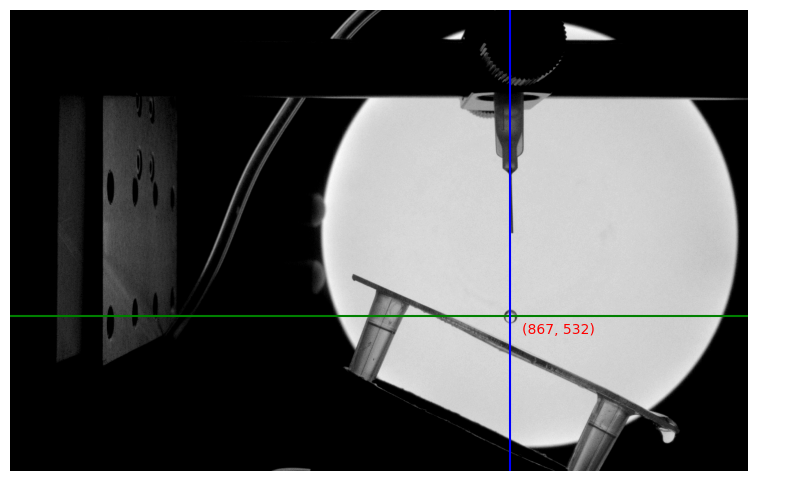

(10, (867, 532))

In [82]:
crop = (800, 450, 1000, 550)
sample = 60
get_center(images[sample],  plot=True, crop=crop)

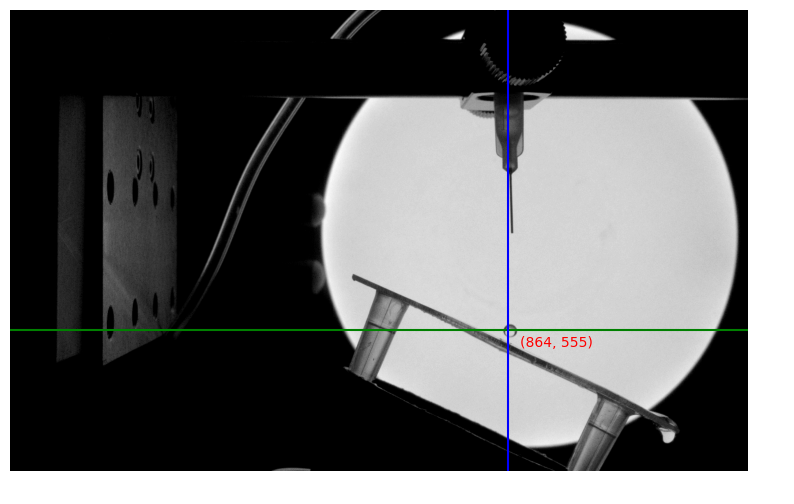

(8, (864, 555))

In [24]:
crop = (850, 510)
sample = 65
h=50
get_center(images[sample],  plot=True, crop=crop, h=h)

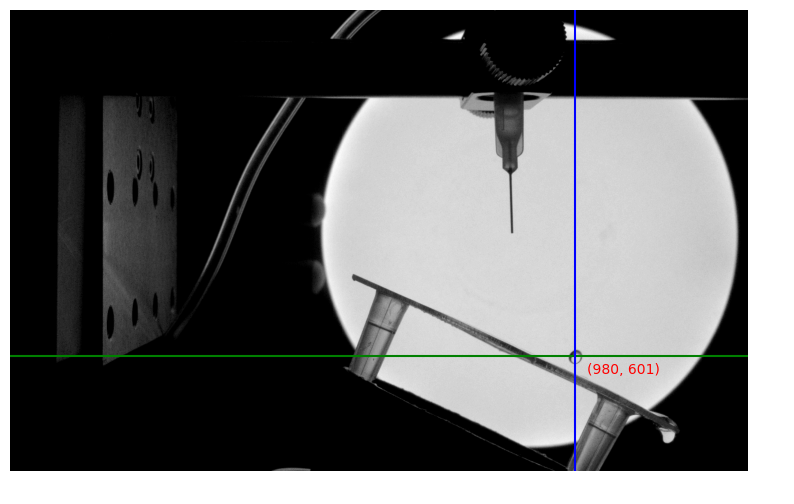

(10, (980, 601))

In [43]:
h=50
crop=(950, 570)
sample = 110
get_center(images[sample], plot=True, crop=crop, h=h)

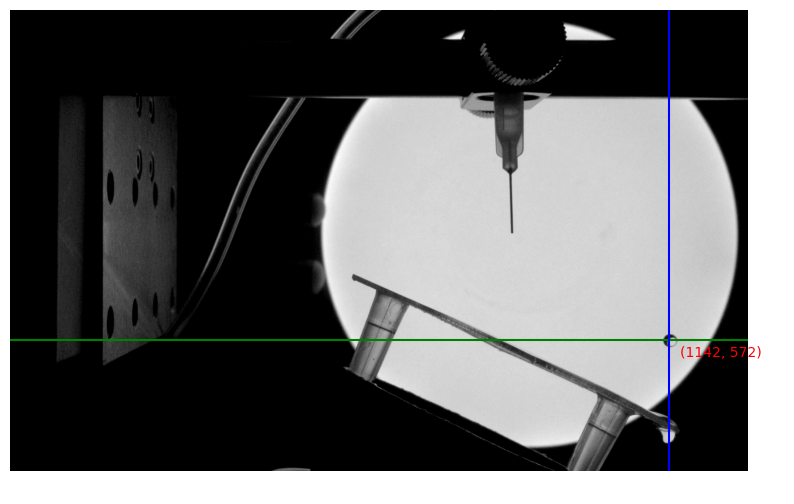

(9, (1142, 572))

In [70]:
h=100
crop=(1050, 490)
sample = 145
get_center(images[sample], plot=True, crop=crop, h=h)

For starting images, start from `(800, 395)`. Upto 35. Then use `(800, 410)` upto 50. Use `(800, 450)` for upto 60. Use `crop = (850, 500)` and `h=50` upto 65. Then collison starts and lasts for 107.

107-110 `h=50` `crop=(950, 570)`

The collison happens from 67 to 107.

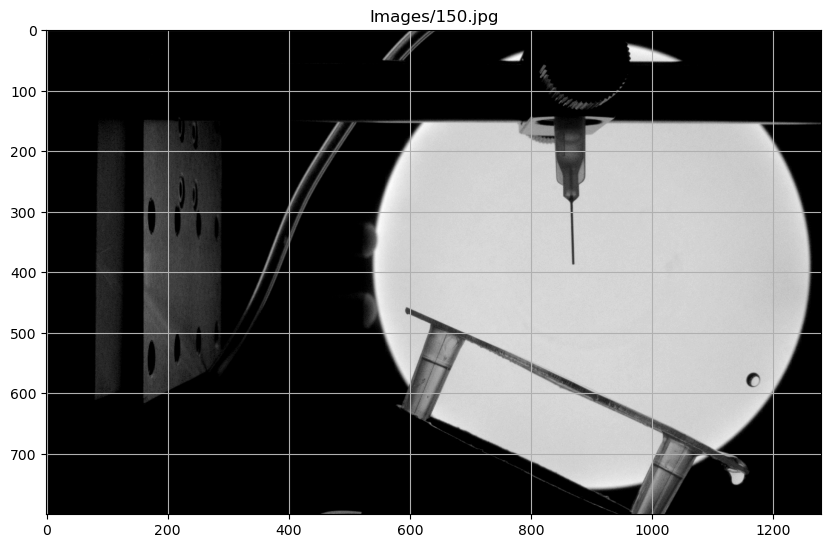

In [62]:
show_image(images[150])

## Using The coordinates to guide

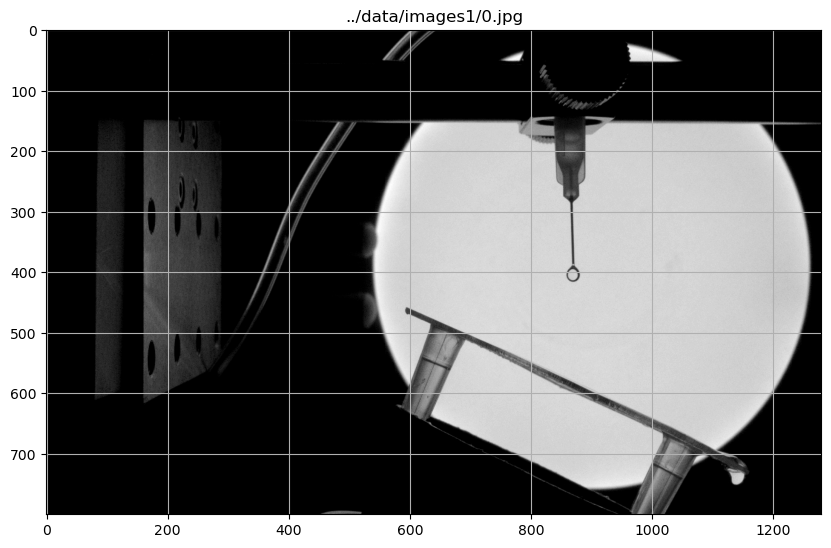

In [8]:
show_image(img_path[0])

### Upto Collision

In [9]:
c = CenterExtracter()

In [10]:
c.X, c.Y 

(700, 350)

In [21]:
x = 150
y = 40
h = 40
(r1, r2), (xc_p, yc_p) = c.get_center(
    img_path[0], x=x, y=y, h=h, w=h, strict=True, plot=False, crop_included=False
)
centers = {
    img_path[0]: (xc_p, yc_p),
}
radii = {
    img_path[0]: (r1, r2),
}

for img in img_path[1:70]:
    # print(img)
    r, (xc, yc) = c.get_center(
        img, x=x, y=y, h=h, w=h, strict=True, plot=False, crop_included=False
    )
    centers[img] = (xc, yc)
    radii[img] = r
    x = x + (xc - xc_p)
    y = y + (yc - yc_p)
    xc_p = xc
    yc_p = yc


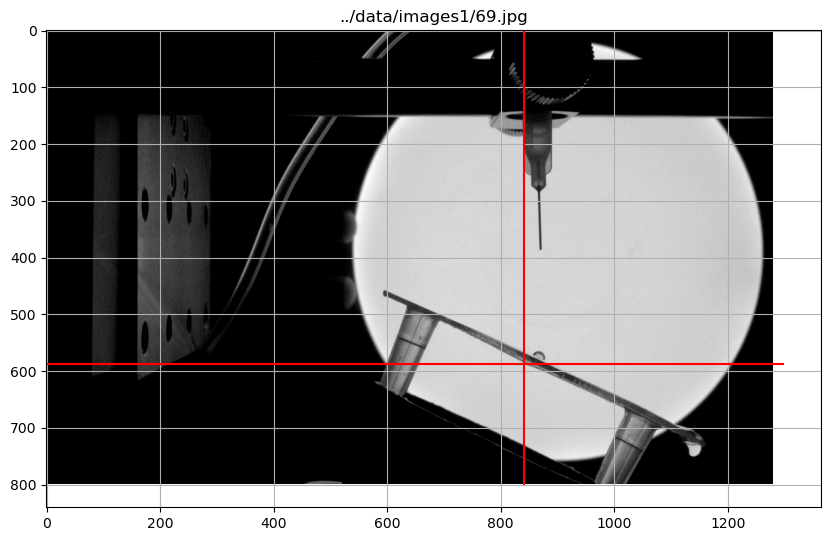

In [22]:
image_path = list(centers.keys())[-1]
plt.figure(figsize=(10, 10))
plt.imshow(plt.imread(image_path), cmap="gray")
plt.grid()
plt.title(image_path)
plt.hlines(c.Y+centers[image_path][1], 0, 1300, color="r")
plt.vlines(c.X+centers[image_path][0], 0, 800, color="r")
plt.show()

### Below the Film

In [23]:
x = 820-c.X
y= 600-c.Y
h=50
r, (xc_p, yc_p) = c.get_center(
    img_path[75], x=x, y=y, h=h, w=h, strict=True, plot=False, crop_included=False
)
# centers = {
#     img_path[0]: (xc_p, yc_p),
# }
for img in img_path[76:100]:
    # print(img)
    r, (xc, yc) = c.get_center(
    img, x=x, y=y, h=h, w=h, strict=True, plot=False, crop_included=False
)
    x = x+(xc-xc_p)
    y = y+(yc-yc_p)
    centers[img] = (xc, yc)
    radii[img] = r
    xc_p = xc
    yc_p = yc

In [24]:
img

'../data/images1/99.jpg'

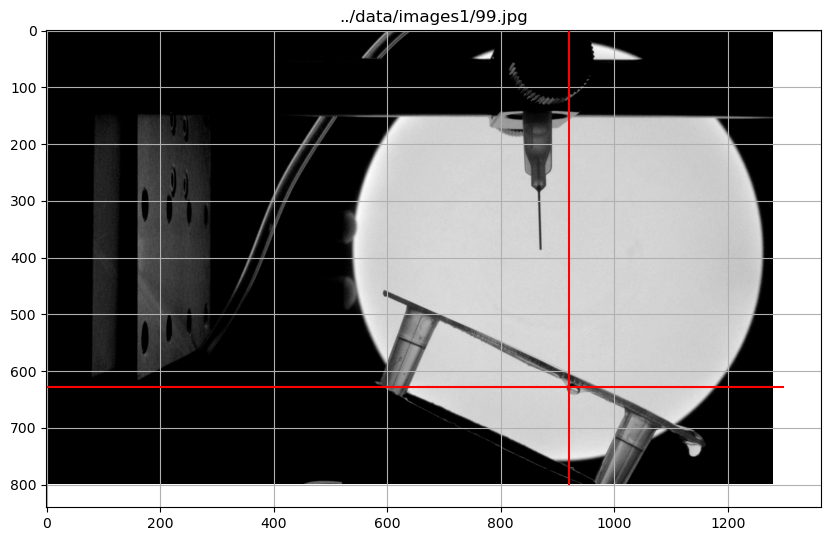

In [25]:
image_path = list(centers.keys())[-1]
plt.figure(figsize=(10, 10))
plt.imshow(plt.imread(image_path), cmap="gray")
plt.grid()
plt.title(image_path)
plt.hlines(c.Y+centers[image_path][1], 0, 1300, color="r")
plt.vlines(c.X+centers[image_path][0], 0, 800, color="r")
plt.show()

### Above film (After Collision)

In [26]:
x = 950-c.X
y= 580-c.Y
h=40
r, (xc_p, yc_p) =c.get_center(
    img_path[106], x=x, y=y, h=h, w=h, strict=True, plot=False, crop_included=False
)
# centers = {
#     img_path[0]: (xc_p, yc_p),
# }
for img in img_path[107:-16]:
    # print(img)
    r, (xc, yc) = c.get_center(
    img, x=x, y=y, h=h, w=h, strict=True, plot=False, crop_included=False
)
    x = x+(xc-xc_p)
    y = y+(yc-yc_p)
    centers[img] = (xc, yc)
    radii[img] = r
    xc_p = xc
    yc_p = yc

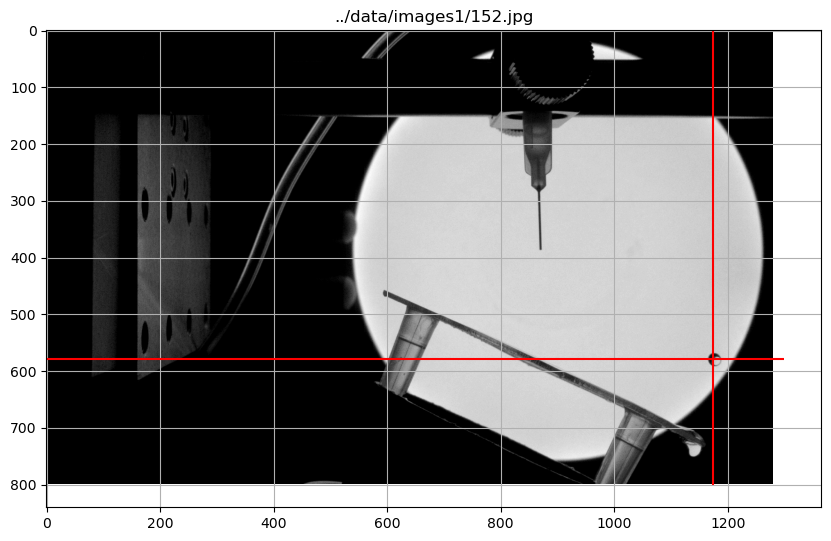

In [27]:
image_path = list(centers.keys())[-3]
plt.figure(figsize=(10, 10))
plt.imshow(plt.imread(image_path), cmap="gray")
plt.grid()
plt.title(image_path)
plt.hlines(c.Y+centers[image_path][1], 0, 1300, color="r")
plt.vlines(c.X+centers[image_path][0], 0, 800, color="r")
plt.show()

In [28]:
len(centers), len(img_path)

(142, 171)

### Some  Sample Images

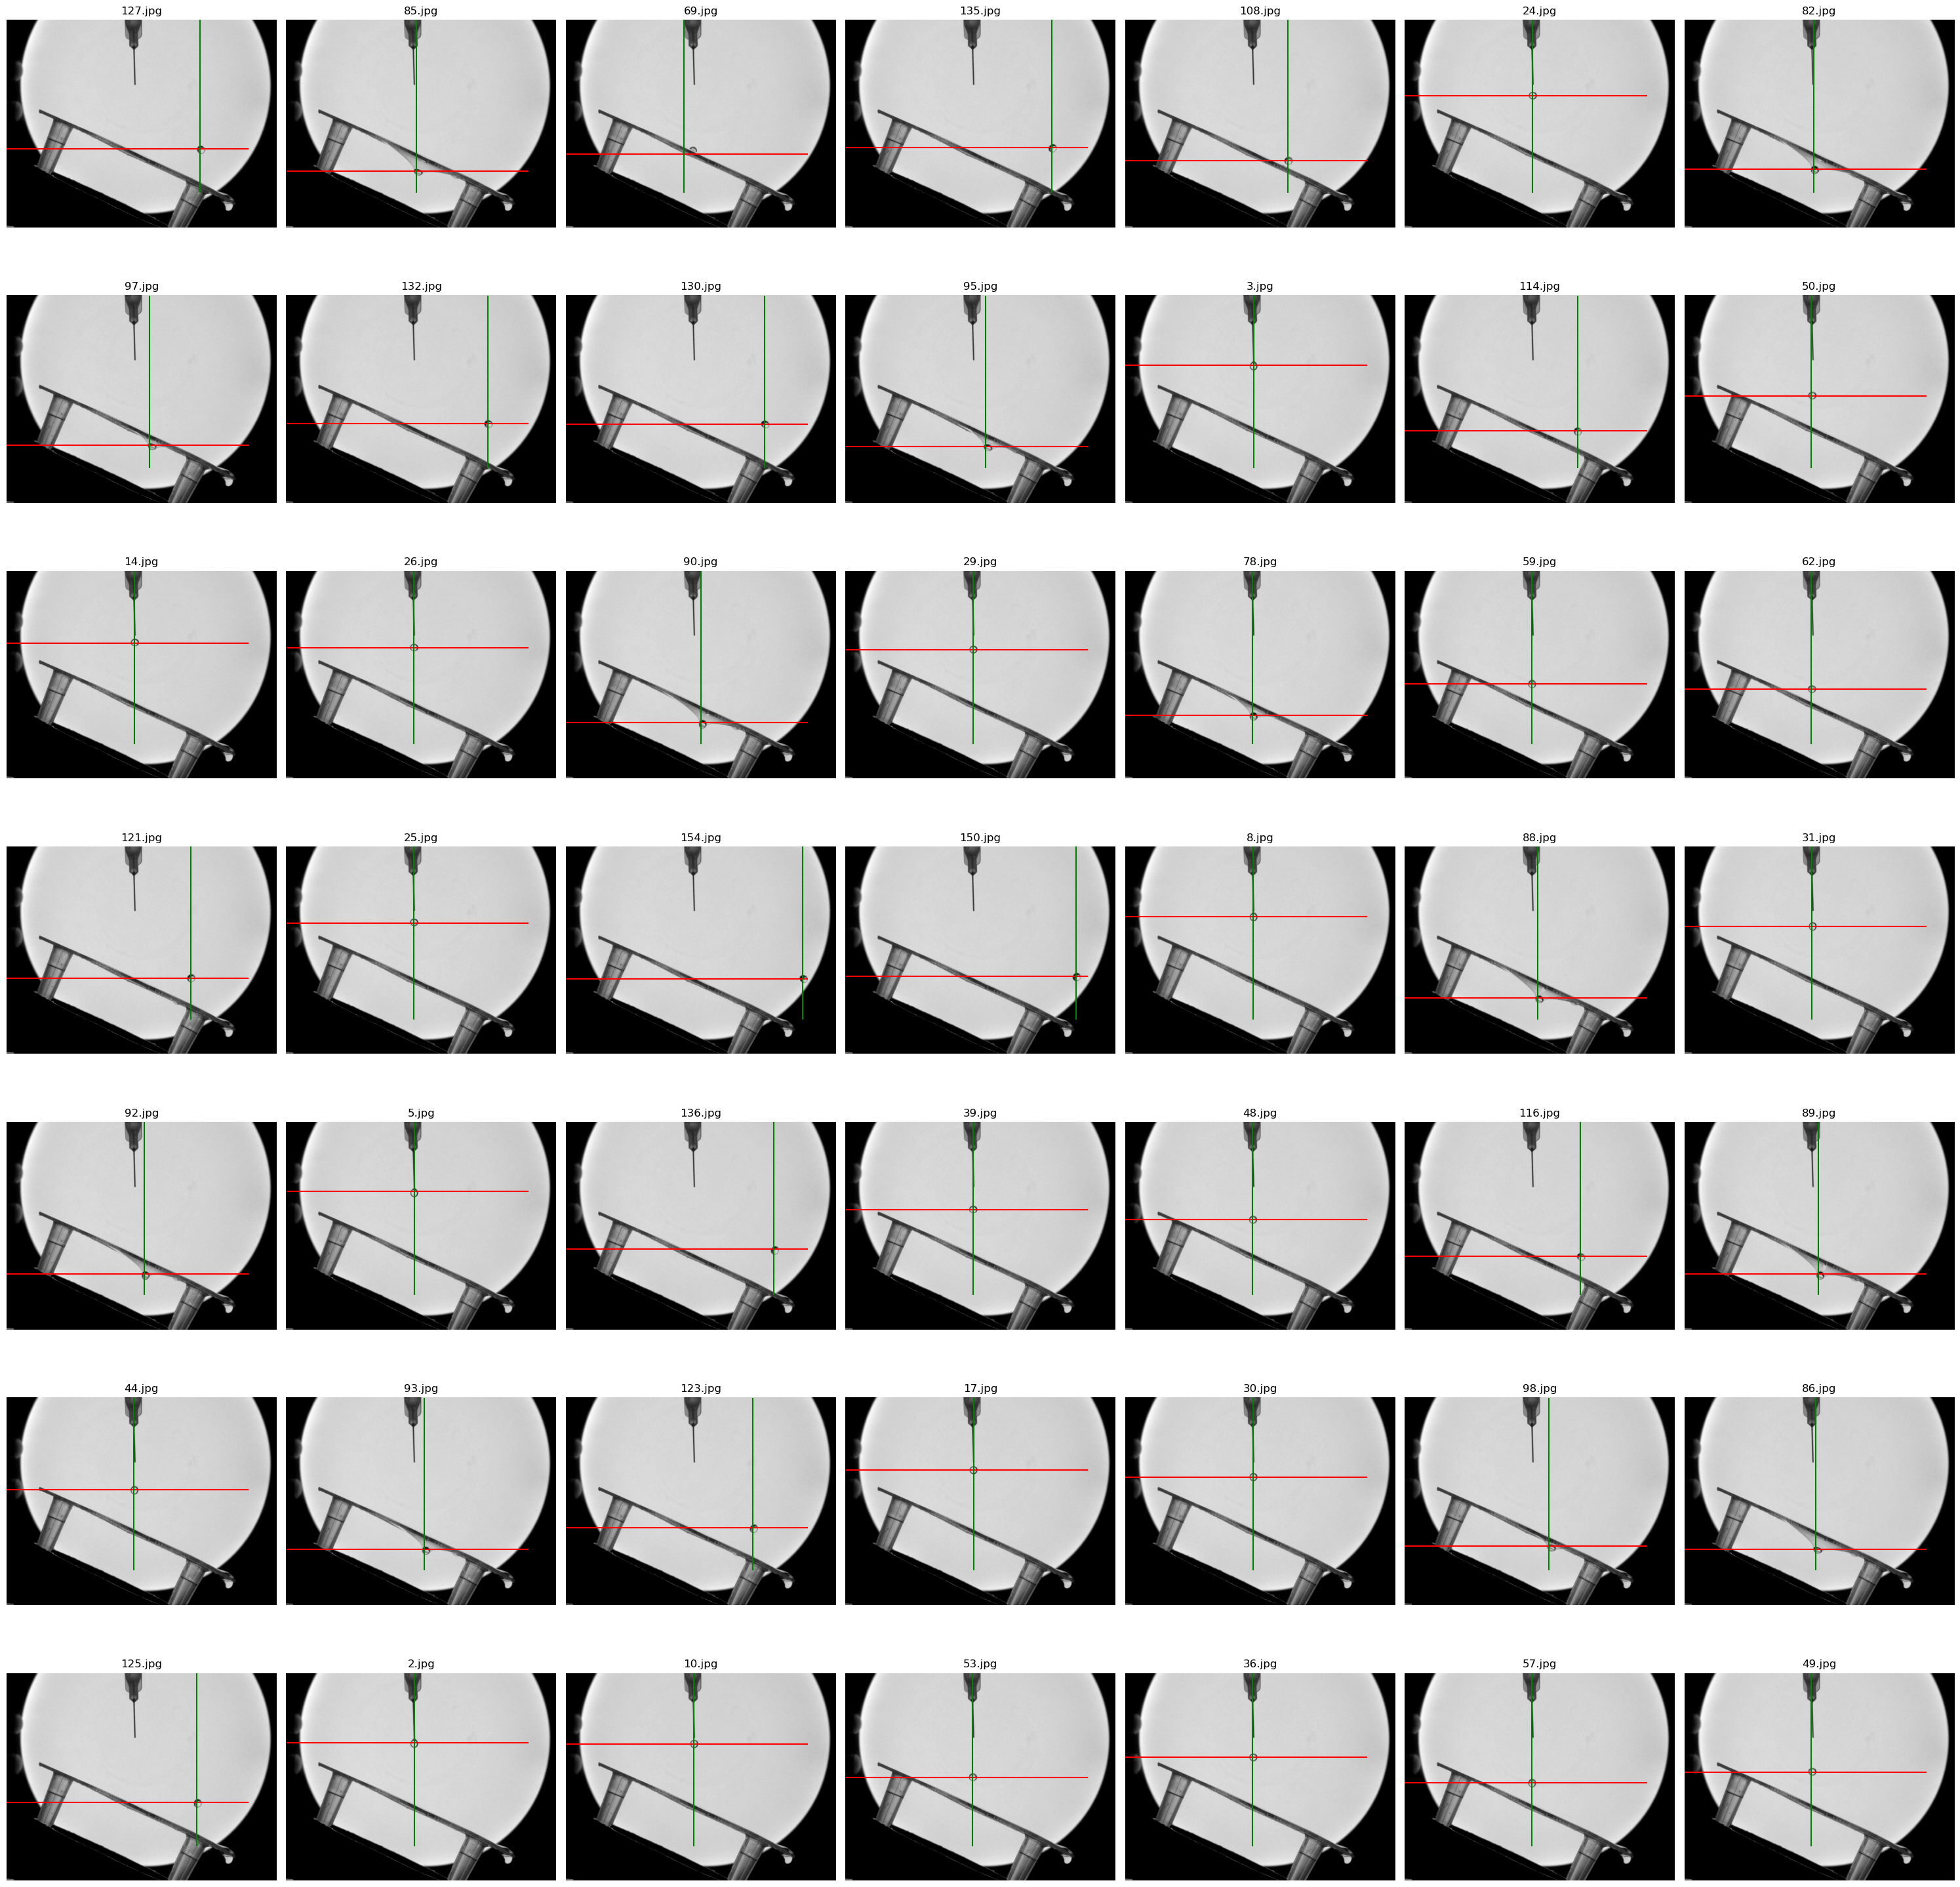

In [30]:
len_samples = 49
plt.figure(figsize=(30, 30))
samples = random.sample(list(centers.keys()), len_samples)
for img in samples:
    plt.subplot(7, 7, samples.index(img)+1)
    x, y = centers[img]
    plt.imshow(plt.imread(img)[200:, 500:], cmap="gray")
    plt.hlines(c.Y+y-200, 0, 1300-600, color="r")
    plt.vlines(c.X+x-500, 0, 800-300, color="g")
    plt.title(img.split("/")[-1])
    plt.axis("off")
plt.tight_layout()
plt.savefig("samples_with_dynamic_cropping.jpg")

In [37]:
df = pd.DataFrame(centers).T.reset_index()
df.columns =["image_path", "x", "y"]
df2 = pd.DataFrame(radii).T.reset_index()
df2.columns =["image_path", "r1", "r2"]
df = pd.merge(df, df2, on="image_path")

In [38]:
df["x"] = df["x"]+c.X
df["y"] = df["y"]+c.Y

In [39]:
df.to_csv("../data/results/with_dynamic_cropping.csv", index=False)

## A Preliminary Analysis of the Coordinates

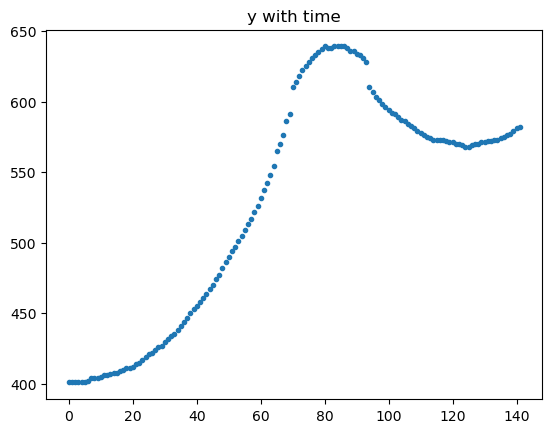

In [53]:
plt.plot(df["y"], ".")
plt.title("y with time");

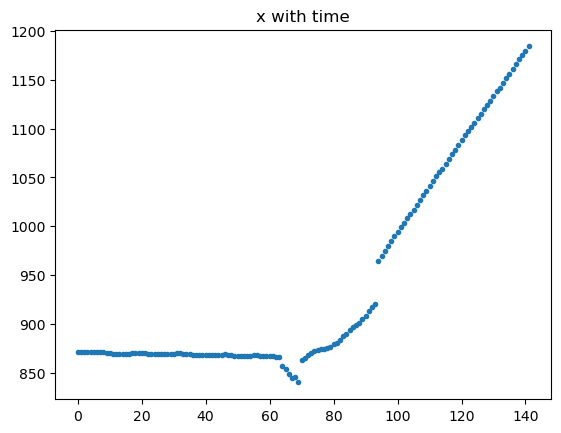

In [54]:
plt.plot(df["x"], ".")
plt.title("x with time");

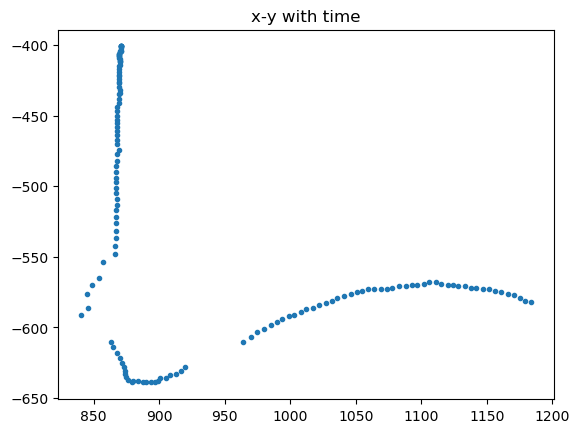

In [55]:
plt.plot(df["x"], -df["y"], ".")
plt.title("x-y with time");

In [56]:
df["vy"] = df["y"].diff()
df["vx"] = df["x"].diff()
df["v"] = np.sqrt(df["vy"]**2 + df["vx"]**2)

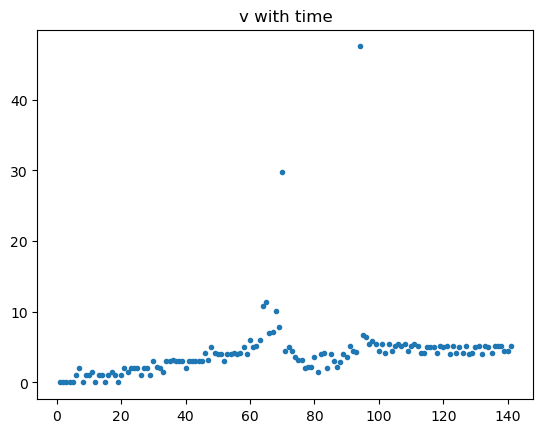

In [57]:
plt.plot(df["v"], ".")
plt.title("v with time");

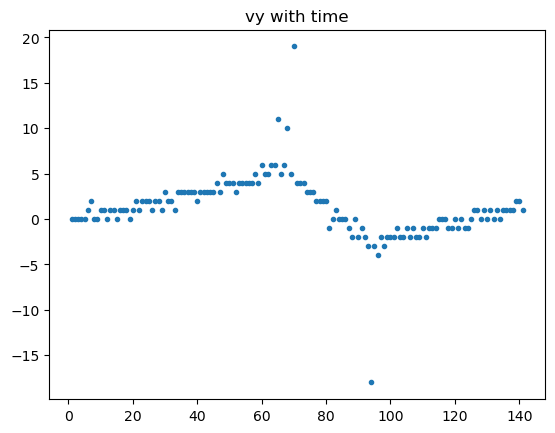

In [58]:
plt.plot(df["vy"], ".")
plt.title("vy with time");

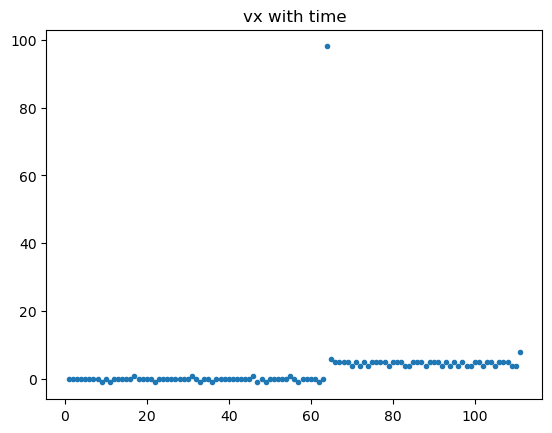

In [211]:
plt.plot(df["vx"], ".")
plt.title("vx with time");

In [59]:
df.describe()

x           y      Radius          vy          vx           v
count   142.000000  142.000000  142.000000  141.000000  141.000000  141.000000
mean    940.838028  528.528169    9.521127    1.283688    2.219858    4.197769
std     104.145536   81.882089    2.020176    3.302221    4.760090    4.736938
min     840.000000  401.000000    3.000000  -18.000000   -9.000000    0.000000
25%     868.250000  441.750000    9.000000    0.000000    0.000000    2.236068
50%     871.000000  570.000000   10.000000    1.000000    1.000000    4.000000
75%    1020.750000  586.750000   10.000000    3.000000    4.000000    5.099020
max    1184.000000  639.000000   18.000000   19.000000   44.000000   47.539457

In [1]:
from run import Run

In [2]:
r = Run("../data/images1")

In [3]:
cs, rs = r.dynamic_cropping(save=True,strict=True, plot=False, crop_included=False)

Starting dynamic cropping...
First step...
Second step...
Third step...
Saving to csv...
